# Group Assignment: Census Data Exploration

*By Jacob Basinger*

In this assignment, I will conduct a preliminary exploration of housing unit and income data in New York City.  Specifically, I will look at the occupancy status of units in the City, and per capita incomes based on census tracts.

## Library and Data Importation

To begin, I must import the relevant libraries and my data.

In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

The above cell imported the pandas, geopandas, contextily, and plot libraries.

In [2]:
occupancy = gpd.read_file('../currentdata/occupancy.geojson')
income = gpd.read_file('../currentdata/income.geojson')

Then I imported the census data on occupancy status and per capita income.

## Data Exploration - Housing Units

First I will check out the data on Housing Units.

In [3]:
occupancy.head()

geoid                       name    B25002001  \
0             01000US              United States  137428986.0   
1           04000US36                   New York    8322722.0   
2        05000US36081          Queens County, NY     859529.0   
3  14000US36005000100  Census Tract 1, Bronx, NY          0.0   
4  14000US36005000200  Census Tract 2, Bronx, NY       1499.0   

   B25002001, Error    B25002002  B25002002, Error   B25002003  \
0            6044.0  120756048.0          236892.0  16672938.0   
1             916.0    7343234.0           14943.0    979488.0   
2             520.0     778932.0            2366.0     80597.0   
3              17.0          0.0              17.0         0.0   
4              56.0       1342.0              78.0       157.0   

   B25002003, Error                                           geometry  
0          231631.0  MULTIPOLYGON (((-168.22527 -14.53591, -168.199...  
1           14479.0  MULTIPOLYGON (((-79.31214 42.68680, -79.24977 ...  
2            2179.0  MULTIPOLYGON (((-74.03813 40.53829, -74.03749 ...  
3              17.0  MULTIPOLYGON (((-73.89772 40.79514, -73.89611 ...  
4              61.0  MULTIPOLYGON (((-73.86522 40.81453, -73.86425 ...

In [4]:
occupancy.tail()

geoid                                              name  \
2167  14000US36085031902                 Census Tract 319.02, Richmond, NY   
2168  14000US36085032300                    Census Tract 323, Richmond, NY   
2169  14000US36085990100                   Census Tract 9901, Richmond, NY   
2170      16000US3651000                                      New York, NY   
2171        31000US35620  New York-Newark-Jersey City, NY-NJ-PA Metro Area   

      B25002001  B25002001, Error  B25002002  B25002002, Error  B25002003  \
2167     1856.0             102.0     1641.0             139.0      215.0   
2168      506.0              25.0      451.0              44.0       55.0   
2169        0.0              12.0        0.0              12.0        0.0   
2170  3494228.0            1138.0  3167034.0            7508.0   327194.0   
2171  7717242.0            1436.0  6997001.0           13462.0   720241.0   

      B25002003, Error                                           geometry  
2167              99.0  MULTIPOLYGON (((-74.17129 40.64052, -74.17118 ...  
2168              36.0  MULTIPOLYGON (((-74.19709 40.63574, -74.19706 ...  
2169              12.0  MULTIPOLYGON (((-74.25909 40.49956, -74.25909 ...  
2170            7056.0  MULTIPOLYGON (((-74.04075 40.70017, -74.04073 ...  
2171           12640.0  MULTIPOLYGON (((-74.88982 40.78773, -74.88971 ...

In [5]:
occupancy.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2172 entries, 0 to 2171
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             2172 non-null   object  
 1   name              2172 non-null   object  
 2   B25002001         2172 non-null   float64 
 3   B25002001, Error  2172 non-null   float64 
 4   B25002002         2172 non-null   float64 
 5   B25002002, Error  2172 non-null   float64 
 6   B25002003         2172 non-null   float64 
 7   B25002003, Error  2172 non-null   float64 
 8   geometry          2172 non-null   geometry
dtypes: float64(6), geometry(1), object(2)
memory usage: 152.8+ KB


In [6]:
occupancy.shape

(2172, 9)

### Cleaning the Data

It looks like our data includes rows for the country, county, city, and metro areas so we will have to drop all of those to keep just the census tract data.  However, these summary rows were not just located at the very beginning/head of the dataset, as seen in the head and tail commands above.  I decided that I would sort the data based on length of geoid so that I can drop all of the rows that have FIPS codes that are not for the census tract level.

In [7]:
occupancy['geoidlength'] = occupancy.geoid.str.len()

First, I added a new column that lists out the length of each FIPS code.  Then, I sorted the data based on that column.

In [8]:
occupancy_sorted = occupancy.sort_values(by='geoidlength' , ascending = True)

In [9]:
occupancy_sorted.head(10)

geoid                                              name  \
0                01000US                                     United States   
1              04000US36                                          New York   
2171        31000US35620  New York-Newark-Jersey City, NY-NJ-PA Metro Area   
2           05000US36081                                 Queens County, NY   
2170      16000US3651000                                      New York, NY   
1456  14000US36081009700                       Census Tract 97, Queens, NY   
1455  14000US36081009600                       Census Tract 96, Queens, NY   
1454  14000US36081009500                       Census Tract 95, Queens, NY   
1453  14000US36081009400                       Census Tract 94, Queens, NY   
1452  14000US36081009100                       Census Tract 91, Queens, NY   

        B25002001  B25002001, Error    B25002002  B25002002, Error  \
0     137428986.0            6044.0  120756048.0          236892.0   
1       8322722.0             916.0    7343234.0           14943.0   
2171    7717242.0            1436.0    6997001.0           13462.0   
2        859529.0             520.0     778932.0            2366.0   
2170    3494228.0            1138.0    3167034.0            7508.0   
1456       1675.0              55.0       1471.0             101.0   
1455        939.0              60.0        925.0              61.0   
1454       1087.0              23.0        850.0              60.0   
1453        840.0              64.0        716.0              73.0   
1452       1445.0              47.0       1087.0             128.0   

       B25002003  B25002003, Error  \
0     16672938.0          231631.0   
1       979488.0           14479.0   
2171    720241.0           12640.0   
2        80597.0            2179.0   
2170    327194.0            7056.0   
1456       204.0              93.0   
1455        14.0              22.0   
1454       237.0              56.0   
1453       124.0              49.0   
1452       358.0             112.0   

                                               geometry  geoidlength  
0     MULTIPOLYGON (((-168.22527 -14.53591, -168.199...            7  
1     MULTIPOLYGON (((-79.31214 42.68680, -79.24977 ...            9  
2171  MULTIPOLYGON (((-74.88982 40.78773, -74.88971 ...           12  
2     MULTIPOLYGON (((-74.03813 40.53829, -74.03749 ...           12  
2170  MULTIPOLYGON (((-74.04075 40.70017, -74.04073 ...           14  
1456  MULTIPOLYGON (((-73.92200 40.77795, -73.92140 ...           18  
1455  MULTIPOLYGON (((-73.83506 40.68301, -73.83458 ...           18  
1454  MULTIPOLYGON (((-73.92339 40.77509, -73.92327 ...           18  
1453  MULTIPOLYGON (((-73.83953 40.68126, -73.83865 ...           18  
1452  MULTIPOLYGON (((-73.93551 40.77754, -73.93508 ...           18

As you can see above, there are five rows with summary data that need to be deleted.  I could use the occupancy_sorted list for the rest of the assignment, but I decided to delete the rows in the occupancy dataset based on the row numbers provided in the output above (so that I would not have to type as much for my variables going forward).  The row numbers are 0, 1, 2, 2170, and 2171.

I then redefined the occupancy dataset to not include those rows that have the summary statistics.

In [10]:
occupancy = occupancy.drop([0 , 1 , 2 , 2170 , 2171])

In [11]:
occupancy.sort_values(by='geoidlength',ascending = True)

geoid                             name  B25002001  \
3     14000US36005000100        Census Tract 1, Bronx, NY        0.0   
1455  14000US36081009600      Census Tract 96, Queens, NY      939.0   
1454  14000US36081009500      Census Tract 95, Queens, NY     1087.0   
1453  14000US36081009400      Census Tract 94, Queens, NY      840.0   
1452  14000US36081009100      Census Tract 91, Queens, NY     1445.0   
...                  ...                              ...        ...   
717   14000US36047043600      Census Tract 436, Kings, NY     1669.0   
716   14000US36047043500      Census Tract 435, Kings, NY     1592.0   
715   14000US36047043400      Census Tract 434, Kings, NY     1351.0   
729   14000US36047044800      Census Tract 448, Kings, NY      759.0   
2169  14000US36085990100  Census Tract 9901, Richmond, NY        0.0   

      B25002001, Error  B25002002  B25002002, Error  B25002003  \
3                 17.0        0.0              17.0        0.0   
1455              60.0      925.0              61.0       14.0   
1454              23.0      850.0              60.0      237.0   
1453              64.0      716.0              73.0      124.0   
1452              47.0     1087.0             128.0      358.0   
...                ...        ...               ...        ...   
717               53.0     1611.0              80.0       58.0   
716               55.0     1502.0              91.0       90.0   
715               73.0     1265.0              78.0       86.0   
729               54.0      654.0              58.0      105.0   
2169              12.0        0.0              12.0        0.0   

      B25002003, Error                                           geometry  \
3                 17.0  MULTIPOLYGON (((-73.89772 40.79514, -73.89611 ...   
1455              22.0  MULTIPOLYGON (((-73.83506 40.68301, -73.83458 ...   
1454              56.0  MULTIPOLYGON (((-73.92339 40.77509, -73.92327 ...   
1453              49.0  MULTIPOLYGON (((-73.83953 40.68126, -73.83865 ...   
1452             112.0  MULTIPOLYGON (((-73.93551 40.77754, -73.93508 ...   
...                ...                                                ...   
717               61.0  MULTIPOLYGON (((-73.98081 40.61445, -73.98022 ...   
716               66.0  MULTIPOLYGON (((-73.91556 40.69492, -73.91411 ...   
715               69.0  MULTIPOLYGON (((-73.97921 40.61250, -73.97847 ...   
729               58.0  MULTIPOLYGON (((-73.97775 40.61740, -73.97757 ...   
2169              12.0  MULTIPOLYGON (((-74.25909 40.49956, -74.25909 ...   

      geoidlength  
3              18  
1455           18  
1454           18  
1453           18  
1452           18  
...           ...  
717            18  
716            18  
715            18  
729            18  
2169           18  

[2167 rows x 10 columns]

As you can see above, there are no longer any rows with geoids of a different length.  I then ran the plot command just to double check that I was only left with the census tract data, which you can see is true below.

<AxesSubplot:>

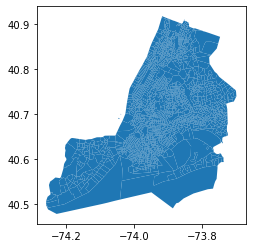

In [12]:
occupancy.plot()

Next, I addressed the columns.  The first step is to delete those that are unnecessary.  Only three of the unnamed columns are necessary, and they are total number of units, number of occupied units, and number of vacant units.

In [13]:
list(occupancy)

['geoid',
 'name',
 'B25002001',
 'B25002001, Error',
 'B25002002',
 'B25002002, Error',
 'B25002003',
 'B25002003, Error',
 'geometry',
 'geoidlength']

In [14]:
columns_to_keep = ['geoid',
 'name',
 'B25002001',
 'B25002002',
 'B25002003',
 'geometry']

I created a new list with only those columns that I plan to keep.  Then I trimmed the occupancy data set to only include those columns.

In [15]:
occupancy = occupancy[columns_to_keep]
occupancy.head()

geoid                        name  B25002001  B25002002  \
3  14000US36005000100   Census Tract 1, Bronx, NY        0.0        0.0   
4  14000US36005000200   Census Tract 2, Bronx, NY     1499.0     1342.0   
5  14000US36005000400   Census Tract 4, Bronx, NY     2183.0     2042.0   
6  14000US36005001600  Census Tract 16, Bronx, NY     2016.0     1971.0   
7  14000US36005001900  Census Tract 19, Bronx, NY     1170.0     1079.0   

   B25002003                                           geometry  
3        0.0  MULTIPOLYGON (((-73.89772 40.79514, -73.89611 ...  
4      157.0  MULTIPOLYGON (((-73.86522 40.81453, -73.86425 ...  
5      141.0  MULTIPOLYGON (((-73.85960 40.81528, -73.85870 ...  
6       45.0  MULTIPOLYGON (((-73.86246 40.81925, -73.86153 ...  
7       91.0  MULTIPOLYGON (((-73.93180 40.80788, -73.93094 ...

The next step was to rename those columns.

In [16]:
list(occupancy)

['geoid', 'name', 'B25002001', 'B25002002', 'B25002003', 'geometry']

In [17]:
occupancy.columns = ['geoid', 'name', 'Total', 'Occupied', 'Vacant', 'geometry']

In [18]:
occupancy.head()

geoid                        name   Total  Occupied  Vacant  \
3  14000US36005000100   Census Tract 1, Bronx, NY     0.0       0.0     0.0   
4  14000US36005000200   Census Tract 2, Bronx, NY  1499.0    1342.0   157.0   
5  14000US36005000400   Census Tract 4, Bronx, NY  2183.0    2042.0   141.0   
6  14000US36005001600  Census Tract 16, Bronx, NY  2016.0    1971.0    45.0   
7  14000US36005001900  Census Tract 19, Bronx, NY  1170.0    1079.0    91.0   

                                            geometry  
3  MULTIPOLYGON (((-73.89772 40.79514, -73.89611 ...  
4  MULTIPOLYGON (((-73.86522 40.81453, -73.86425 ...  
5  MULTIPOLYGON (((-73.85960 40.81528, -73.85870 ...  
6  MULTIPOLYGON (((-73.86246 40.81925, -73.86153 ...  
7  MULTIPOLYGON (((-73.93180 40.80788, -73.93094 ...

Now, we are left with a dataset that includes the total number of housing units per census tract, and the number of those units that are occupied versus vacant.

In the spirit of consistency with the lab, I decided to double check the data by adding up the occupied and vacant columns to see if they equal the total.

In [19]:
random_tract = occupancy.sample()
print(str(random_tract.iloc[0]['Occupied'] + random_tract.iloc[0]['Vacant']) + ' equals ' + str(random_tract.iloc[0]['Total']))

1828.0 equals 1828.0


To finish off the data wrangling I decided to add columns for percentages of occupied versus vacant.

In [20]:
occupancy['Percent Occupied'] = occupancy['Occupied']/occupancy['Total']*100
occupancy['Percent Vacant'] = occupancy['Vacant']/occupancy['Total']*100
occupancy.head()

/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


geoid                        name   Total  Occupied  Vacant  \
3  14000US36005000100   Census Tract 1, Bronx, NY     0.0       0.0     0.0   
4  14000US36005000200   Census Tract 2, Bronx, NY  1499.0    1342.0   157.0   
5  14000US36005000400   Census Tract 4, Bronx, NY  2183.0    2042.0   141.0   
6  14000US36005001600  Census Tract 16, Bronx, NY  2016.0    1971.0    45.0   
7  14000US36005001900  Census Tract 19, Bronx, NY  1170.0    1079.0    91.0   

                                            geometry  Percent Occupied  \
3  MULTIPOLYGON (((-73.89772 40.79514, -73.89611 ...               NaN   
4  MULTIPOLYGON (((-73.86522 40.81453, -73.86425 ...         89.526351   
5  MULTIPOLYGON (((-73.85960 40.81528, -73.85870 ...         93.540999   
6  MULTIPOLYGON (((-73.86246 40.81925, -73.86153 ...         97.767857   
7  MULTIPOLYGON (((-73.93180 40.80788, -73.93094 ...         92.222222   

   Percent Vacant  
3             NaN  
4       10.473649  
5        6.459001  
6        2.232143  
7        7.777778

### Charts and Plots

To begin, I grabbed some summary statistics of the data.

In [21]:
occupancy['Percent Occupied'].describe()

count    2117.000000
mean       91.135857
std         6.831235
min         0.000000
25%        88.829787
50%        92.454835
75%        95.181477
max       100.000000
Name: Percent Occupied, dtype: float64

In [22]:
occupancy['Occupied'].describe()

count     2167.000000
mean      1461.483156
std       1011.253948
min          0.000000
25%        788.000000
50%       1251.000000
75%       1851.500000
max      12998.000000
Name: Occupied, dtype: float64

I wanted to try out different kinds of charts.  As you can see below, I made a scatter chart, but it is not very interesting.

In [23]:
occupancy.plot.scatter(x='Total', y='Percent Occupied')

<AxesSubplot:xlabel='Total', ylabel='Percent Occupied'>

The scatter chart basically just describes that as the total number of units goes up, the percent of those units that are occupied also goes up.  However, even at low totals there are still high occupancy percentages.

I then plotted a histogram to see the frequencies of various occupancy rates.

In [24]:
occupancy['Percent Occupied'].plot.hist(bins=500)

<AxesSubplot:ylabel='Frequency'>

As shown above, occupancy rates are mostly between 80 and 100%.

Then I started to map the data.  First I plotted it based on total number of housing units.

<AxesSubplot:>

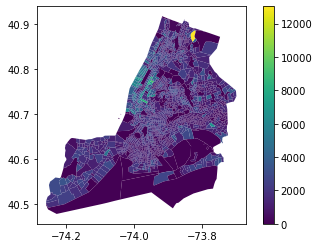

In [25]:
occupancy.plot(column='Total', legend=True)

Based on the plot above, it looks like there may be an outlier with tons of units in the north part of the City.  To check it out I sorted the data based on total units.

In [26]:
occupancy.sort_values(by='Total',ascending = False).head()

geoid                            name    Total  Occupied  \
337   14000US36005046201  Census Tract 462.01, Bronx, NY  13036.0   12998.0   
1239  14000US36061013600  Census Tract 136, New York, NY   9198.0    8134.0   
1147  14000US36061004400   Census Tract 44, New York, NY   8383.0    8089.0   
1260  14000US36061015400  Census Tract 154, New York, NY   8299.0    7264.0   
1229  14000US36061012600  Census Tract 126, New York, NY   8160.0    6980.0   

      Vacant                                           geometry  \
337     38.0  MULTIPOLYGON (((-73.83488 40.87550, -73.83479 ...   
1239  1064.0  MULTIPOLYGON (((-73.95219 40.77302, -73.95186 ...   
1147   294.0  MULTIPOLYGON (((-73.98202 40.73201, -73.98156 ...   
1260  1035.0  MULTIPOLYGON (((-73.95212 40.78139, -73.95166 ...   
1229  1180.0  MULTIPOLYGON (((-73.96156 40.76844, -73.96110 ...   

      Percent Occupied  Percent Vacant  
337          99.708500        0.291500  
1239         88.432268       11.567732  
1147         96.492902        3.507098  
1260         87.528618       12.471382  
1229         85.539216       14.460784

I googled it to double check, but this census tract really has 13000 units!

I then went on to make maps based upon the percentages.

<AxesSubplot:>

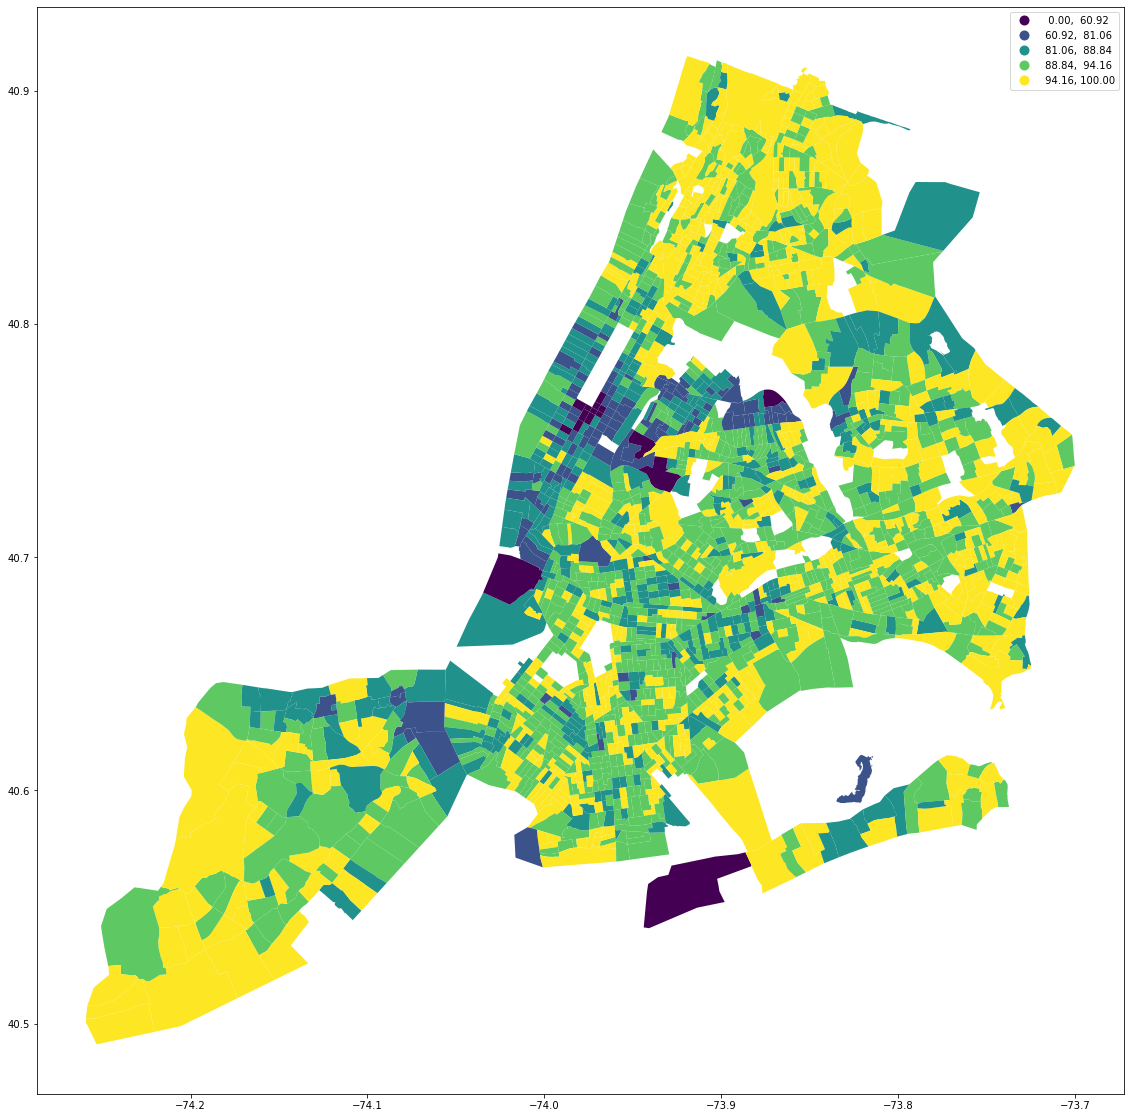

In [27]:
occupancy.plot(figsize=(20,20), column='Percent Occupied', legend=True, scheme='NaturalBreaks')

As seen above, there are census tracts that have been left white due to having a 0% occupancy rate or due to missing data.  I decided to color in those tracts as gray with hatching.

<AxesSubplot:>

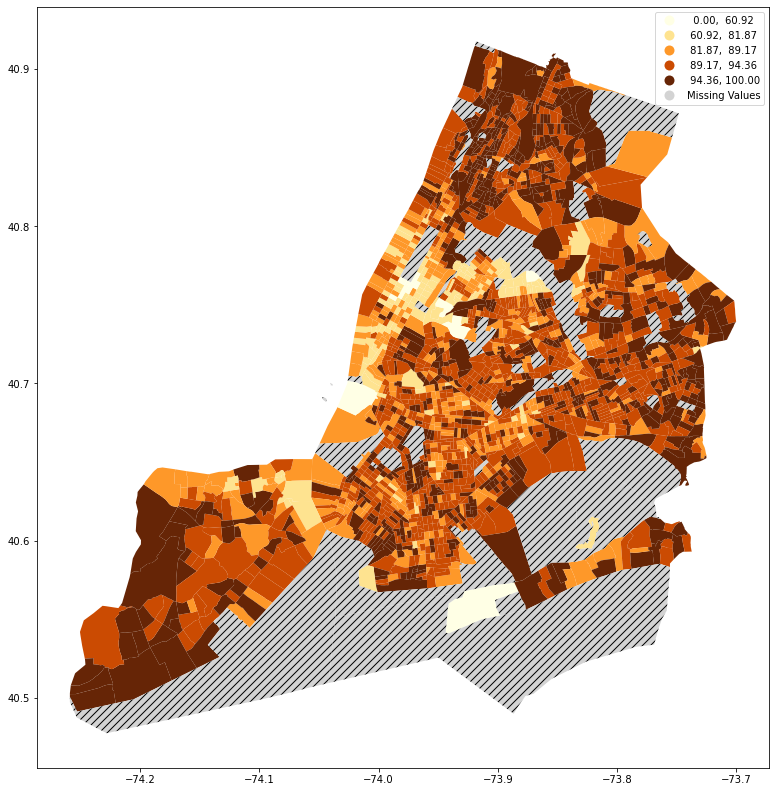

In [28]:
occupancy.plot(
    figsize=(14,14), 
    column='Percent Occupied', 
    cmap='YlOrBr',
    legend=True, 
    scheme='NaturalBreaks',  
    missing_kwds={
        'color': 'lightgrey', 
        "hatch": "///", 
        "label": "Missing Values"
        }
    
)

I prefer the natural breaks format.  Just to check out the opposite type of map, I decided to look at a plot of the percent vacant as well.

<AxesSubplot:>

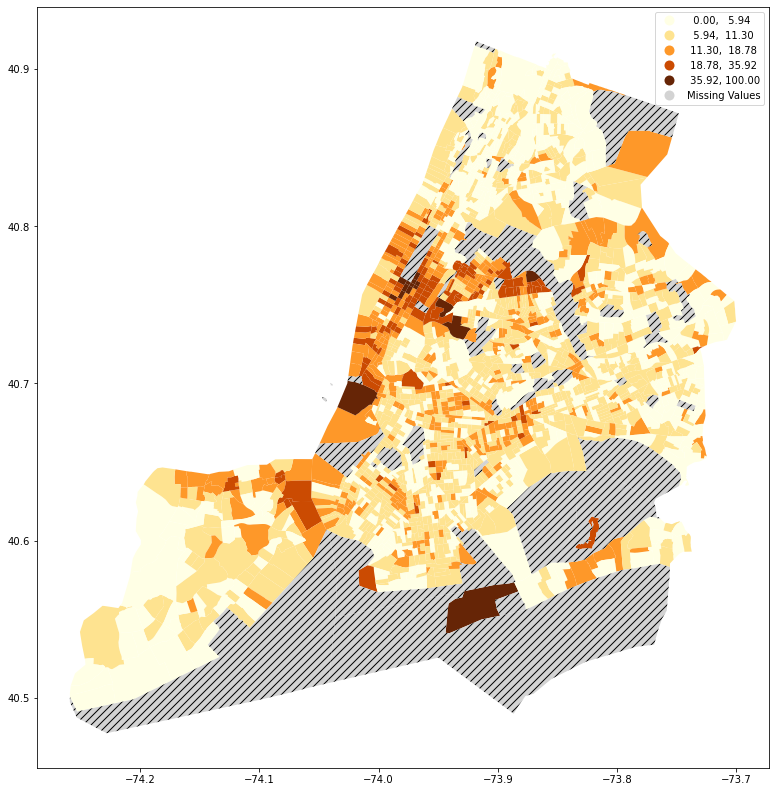

In [29]:
occupancy.plot(
    figsize=(14,14), 
    column='Percent Vacant', 
    cmap='YlOrBr',
    legend=True, 
    scheme='NaturalBreaks',  
    missing_kwds={
        'color': 'lightgrey', 
        "hatch": "///",
        "label": "Missing Values"
        }
    
)

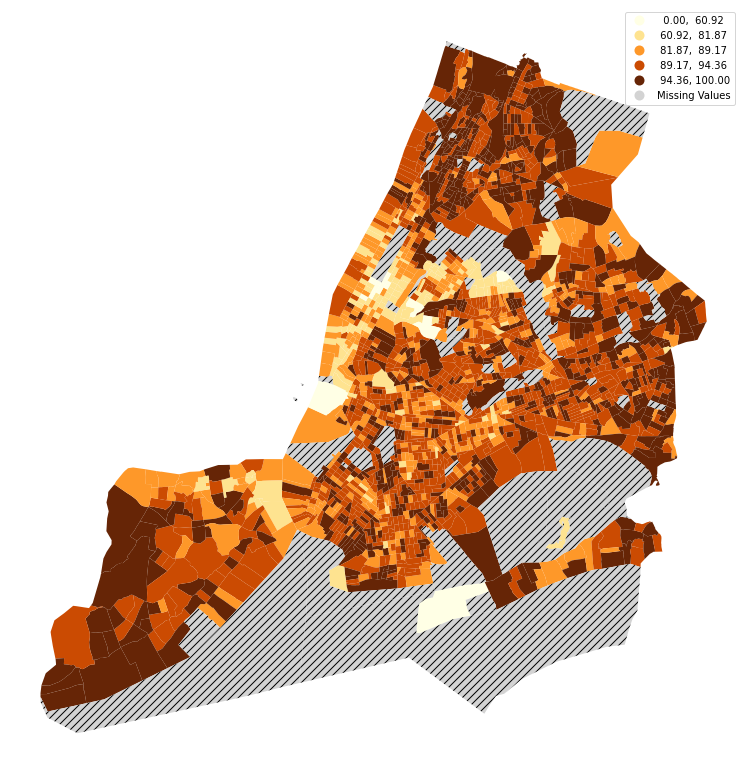

In [30]:
#My final plot map is below
occupancymap = occupancy.plot(
    figsize=(14,14), 
    column='Percent Occupied', 
    cmap='YlOrBr',
    legend=True, 
    scheme='NaturalBreaks',  
    missing_kwds={
        'color': 'lightgrey', 
        "hatch": "///", 
        "label": "Missing Values"
        }
    
).set_axis_off()

Next I decided to add a basemap to the percentage occupied plot, specifically for those areas that have less than and greater than 90% occupancy.

In [31]:
occupancy.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [32]:
occupancywm = occupancy.to_crs(epsg=3857)
occupancywm.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

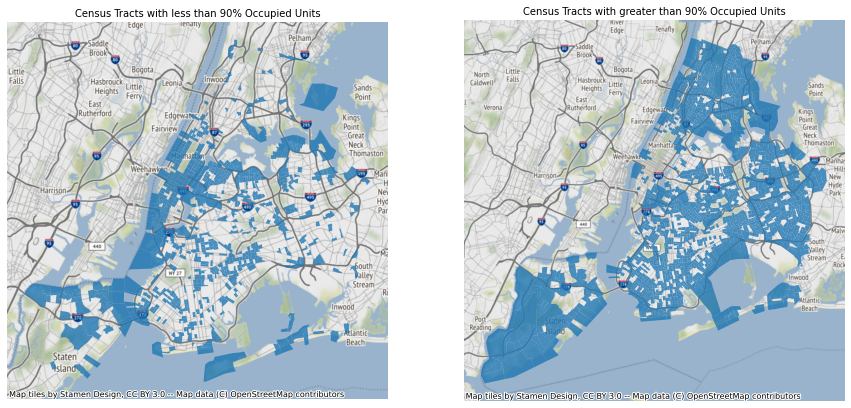

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(15, 15))
ax1, ax2 = axs

occupancywm[occupancywm['Percent Occupied'] < 90].plot(
    ax=ax1,  
    alpha=0.8)

occupancywm[occupancywm['Percent Occupied'] > 90].plot(
    ax=ax2, 
    alpha=0.8)

ax1.axis('off')
ax2.axis('off')

ax1.set_title('Census Tracts with less than 90% Occupied Units',fontsize=10)
ax2.set_title('Census Tracts with greater than 90% Occupied Units',fontsize=10)

ctx.add_basemap(ax1)
ctx.add_basemap(ax2)

As you can see, it seems like Manhattan has a lower occupancy rate than other places in the City.  It will be interesting to look at the temporality of this data in order to determine what the changes in occupancy rate have been based on area of the City.

I then decided to play around with the folium mapping capabilities, particularly because I wanted to overlay the choropleth map on a base map and I was unable to figure out how to do so just using geopandas.

In [34]:
import folium

In [35]:
m = folium.Map(location=[40.7, -74], tiles='cartodb positron', zoom_start=11)
m

First I created the base map and centered it in the relevant location.  Then, using the choropleth function in folium, I was able to overlay my choropleth map based on the percentage of occupied units.  I decided to base my bins off of the natural breaks that were provided in the plot maps above.

In [36]:
folium.Choropleth(
    geo_data=occupancywm,
    name="choropleth",
    data=occupancywm,
    columns=['geoid', "Percent Occupied"],
    key_on="feature.properties.geoid",
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    nan_fill_opacity=0.1, 
    highlight=True, 
    legend_name="Percentage Occupied Units",
    bins=[0, 60, 80, 90, 95, 100.0], 
    reset=True
).add_to(m)

folium.LayerControl().add_to(m)

m

As you can see above, this returns a cool interactive map with the choropleth of occupancy percentage overlaid on a base map.  I was even able to make it so the census block highlights when you run your cursor over it.

Overall, the occupancy data is interesting because it can show what areas in the City have the highest demand (at least theoretically so).  Hopefully we can explore the temporal change in this data in our final project to see where people have been moving to and from.

## Data Exploration - Per Capita Income

Because of the depth of the above exploration (and the memory limit imposed on jupyternotebook), I will only do a brief income exploration.

First I looked at the head and tail to see where the summary row was located.

In [37]:
income.head()

geoid                        name  B19301001  \
0  14000US36005000100   Census Tract 1, Bronx, NY     3341.0   
1  14000US36005000200   Census Tract 2, Bronx, NY    22015.0   
2  14000US36005000400   Census Tract 4, Bronx, NY    37619.0   
3  14000US36005001600  Census Tract 16, Bronx, NY    22577.0   
4  14000US36005001900  Census Tract 19, Bronx, NY    24405.0   

   B19301001, Error                                           geometry  
0             913.0  MULTIPOLYGON (((-73.89772 40.79514, -73.89611 ...  
1            2982.0  MULTIPOLYGON (((-73.86522 40.81453, -73.86425 ...  
2            3786.0  MULTIPOLYGON (((-73.85960 40.81528, -73.85870 ...  
3           10585.0  MULTIPOLYGON (((-73.86246 40.81925, -73.86153 ...  
4            4793.0  MULTIPOLYGON (((-73.93180 40.80788, -73.93094 ...

It's not at the head.

In [38]:
income.tail()

geoid                               name  B19301001  \
2163  14000US36085031901  Census Tract 319.01, Richmond, NY    17313.0   
2164  14000US36085031902  Census Tract 319.02, Richmond, NY    23975.0   
2165  14000US36085032300     Census Tract 323, Richmond, NY    33175.0   
2166  14000US36085990100    Census Tract 9901, Richmond, NY        NaN   
2167      16000US3651000                       New York, NY    39828.0   

      B19301001, Error                                           geometry  
2163            4154.0  MULTIPOLYGON (((-74.16647 40.62852, -74.16645 ...  
2164            4413.0  MULTIPOLYGON (((-74.17129 40.64052, -74.17118 ...  
2165           10040.0  MULTIPOLYGON (((-74.19709 40.63574, -74.19706 ...  
2166               NaN  MULTIPOLYGON (((-74.25909 40.49956, -74.25909 ...  
2167             247.0  MULTIPOLYGON (((-74.04075 40.70017, -74.04073 ...

Looks like there's one at the tail.

Just to be sure I am going to sort by geoid length like above.

In [39]:
income['geoidlength'] = income.geoid.str.len()
income_sorted = income.sort_values(by='geoidlength' , ascending = True)
income_sorted.head()

geoid                         name  B19301001  \
2167      16000US3651000                 New York, NY    39828.0   
1453  14000US36081009700  Census Tract 97, Queens, NY    44949.0   
1452  14000US36081009600  Census Tract 96, Queens, NY    29106.0   
1451  14000US36081009500  Census Tract 95, Queens, NY    37572.0   
1450  14000US36081009400  Census Tract 94, Queens, NY    24564.0   

      B19301001, Error                                           geometry  \
2167             247.0  MULTIPOLYGON (((-74.04075 40.70017, -74.04073 ...   
1453            4245.0  MULTIPOLYGON (((-73.92200 40.77795, -73.92140 ...   
1452            4437.0  MULTIPOLYGON (((-73.83506 40.68301, -73.83458 ...   
1451            3084.0  MULTIPOLYGON (((-73.92339 40.77509, -73.92327 ...   
1450            4086.0  MULTIPOLYGON (((-73.83953 40.68126, -73.83865 ...   

      geoidlength  
2167           14  
1453           18  
1452           18  
1451           18  
1450           18

Looks like there is only one row that needs deleted, and its the last one: 2167.

In [40]:
income = income.drop([2167])
income.tail()

geoid                               name  B19301001  \
2162  14000US36085030302  Census Tract 303.02, Richmond, NY    27002.0   
2163  14000US36085031901  Census Tract 319.01, Richmond, NY    17313.0   
2164  14000US36085031902  Census Tract 319.02, Richmond, NY    23975.0   
2165  14000US36085032300     Census Tract 323, Richmond, NY    33175.0   
2166  14000US36085990100    Census Tract 9901, Richmond, NY        NaN   

      B19301001, Error                                           geometry  \
2162            2970.0  MULTIPOLYGON (((-74.16814 40.62208, -74.16793 ...   
2163            4154.0  MULTIPOLYGON (((-74.16647 40.62852, -74.16645 ...   
2164            4413.0  MULTIPOLYGON (((-74.17129 40.64052, -74.17118 ...   
2165           10040.0  MULTIPOLYGON (((-74.19709 40.63574, -74.19706 ...   
2166               NaN  MULTIPOLYGON (((-74.25909 40.49956, -74.25909 ...   

      geoidlength  
2162           18  
2163           18  
2164           18  
2165           18  
2166           18

To double check I did it right, I plotted the data to see if the county-wide statistic was still there.

<AxesSubplot:>

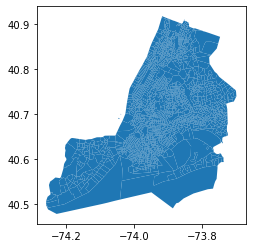

In [41]:
income.plot()

Success!

Next comes the column cleaning.

In [42]:
list(income)

['geoid', 'name', 'B19301001', 'B19301001, Error', 'geometry', 'geoidlength']

In [43]:
incomecolumns = ['geoid', 'name', 'B19301001', 'geometry']

In [44]:
income = income[incomecolumns]
income.head()

geoid                        name  B19301001  \
0  14000US36005000100   Census Tract 1, Bronx, NY     3341.0   
1  14000US36005000200   Census Tract 2, Bronx, NY    22015.0   
2  14000US36005000400   Census Tract 4, Bronx, NY    37619.0   
3  14000US36005001600  Census Tract 16, Bronx, NY    22577.0   
4  14000US36005001900  Census Tract 19, Bronx, NY    24405.0   

                                            geometry  
0  MULTIPOLYGON (((-73.89772 40.79514, -73.89611 ...  
1  MULTIPOLYGON (((-73.86522 40.81453, -73.86425 ...  
2  MULTIPOLYGON (((-73.85960 40.81528, -73.85870 ...  
3  MULTIPOLYGON (((-73.86246 40.81925, -73.86153 ...  
4  MULTIPOLYGON (((-73.93180 40.80788, -73.93094 ...

In [45]:
list(income)

['geoid', 'name', 'B19301001', 'geometry']

In [46]:
income.columns = ['geoid', 'name', 'Per Capita Income', 'geometry']

### Charts and Maps

Here I have briefly included some charts and maps showing the distribution of per capita income amounts in NYC.

<AxesSubplot:ylabel='Frequency'>

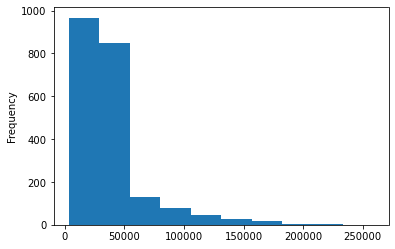

In [47]:
income['Per Capita Income'].plot.hist(bins=10)

<AxesSubplot:>

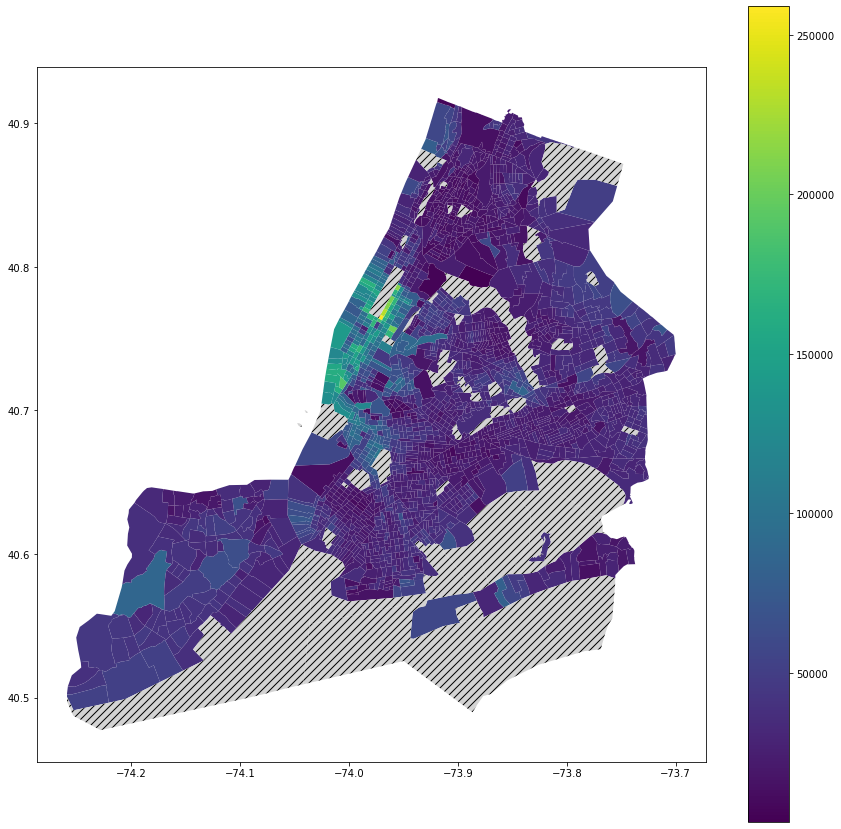

In [48]:
income.plot(column='Per Capita Income', legend=True, figsize=(15,15), missing_kwds={
        'color': 'lightgrey', 
        "hatch": "///", 
        "label": "Missing Values"
        })

<AxesSubplot:>

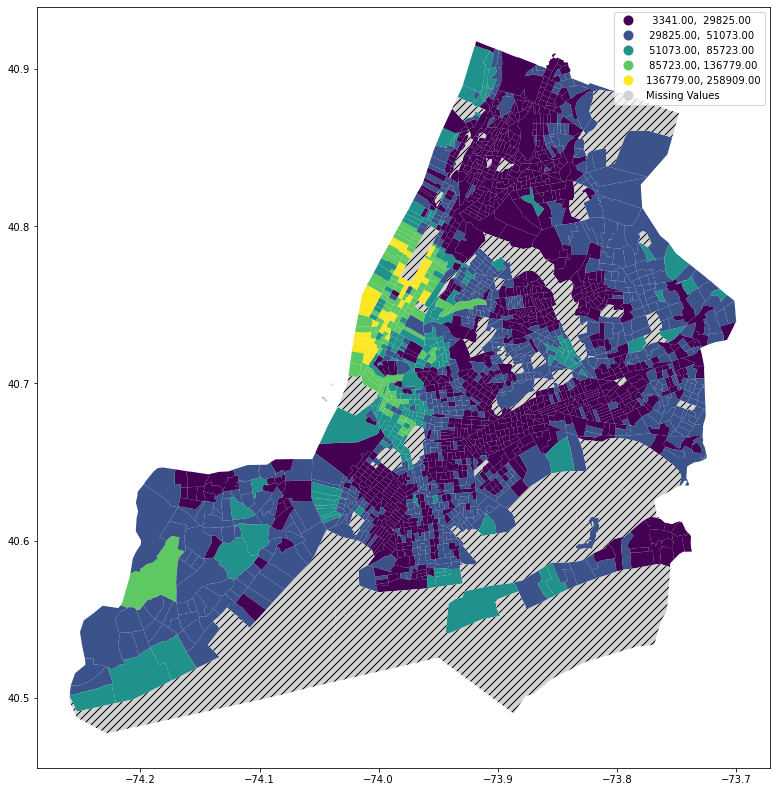

In [49]:
income.plot(
    figsize=(14,14), 
    column='Per Capita Income',
    legend=True, 
    scheme='NaturalBreaks',  
    missing_kwds={
        'color': 'lightgrey', 
        "hatch": "///", 
        "label": "Missing Values"
        }
    
)

This income map shows how higher incomes are distributed in Manhattan (the lighter colored locations).  It will be interesting to compare this income information with the sea level rise data once we begin to combine multiple layers.

## Conclusion

Overall I thought this assignment was a helpful way to practice data exploration, refining, and visualization.  I am excited to add a temporal aspect to this analysis, and to combine multiple layers to create strong visualizations of the impacts of sea level rise.